# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using a train-test split.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Let's Use Our Ames Housing Data Again!

We included the code to load the data below.

In [1]:
# Run this cell without changes
import pandas as pd
import numpy as np
ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## Perform a Train-Test Split

Use `train_test_split` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) with the default split size. At the end you should have `X_train`, `X_test`, `y_train`, and `y_test` variables, where `y` represents `SalePrice` and `X` represents all other columns. It is also important to set a random state so that your results will be repeatable. 

In [2]:
# Your code here: split the data into training and test sets
y = ames['SalePrice']
X = ames.drop('SalePrice', axis = 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

## Prepare Both Sets for Modeling

This code is completed for you and should work as long as the correct variables were created.

In [3]:
# Run this cell without changes
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']
categoricals = ['BldgType', 'KitchenQual', 'Street']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

## Fit a Linear Regression on the Training Data

In [4]:
# Your code here: import the linear regression model class, initialize a model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [5]:
# Your code here: fit the model to train data
# Fit with Training Data
lr.fit(X_train, y_train)

LinearRegression()

## Evaluate and Validate Model

### Generate Predictions on Training and Test Sets

In [6]:
# Make predictions on training and test sets  
y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

### Calculate the Mean Squared Error (MSE)

You can use `mean_squared_error` from scikit-learn ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)).

In [7]:
# Your code here: calculate training and test MSE
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_hat_train, y_train)
test_mse = mean_squared_error(y_hat_test, y_test)

print(f'Train MSE: ', train_mse)
print(f'Test MSE:', test_mse)

Train MSE:  1772517384.9791172
Test MSE: 1982741233.3656316


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

## Level Up: Evaluate the Effect of Train-Test Split Size

Iterate over a range of train-test split sizes from .5 to .9. For each of these, generate a new train/test split sample. Preprocess both sets of data. Fit a model to the training sample and calculate both the training error and the test error (MSE) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

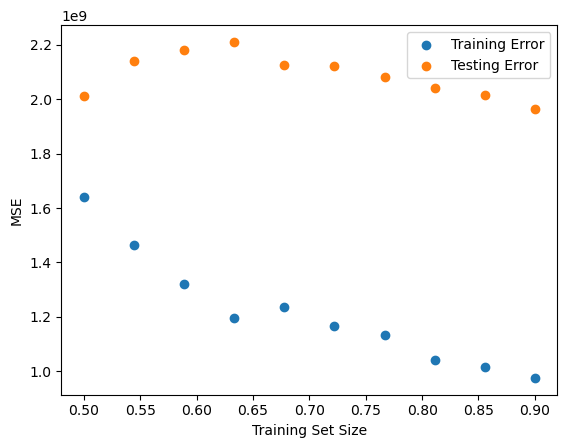

In [10]:
# Your code here
import matplotlib.pyplot as plt

train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)

for t_size in t_sizes:

    # Create new split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = t_size, random_state=42)

    # PreProcess
    log = FunctionTransformer(np.log, validate=True)
    ohe = OneHotEncoder(drop='first', sparse_output=False)

    # Fit transformers
    log_transformer.fit(X_train[continuous])
    ohe.fit(X_train[categoricals])

    # Transform training data
    X_train = pd.concat([
        pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
        pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
    ], axis=1)

    # Transform test data
    X_test = pd.concat([
        pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
        pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
    ], axis=1)

    # Fit with Training Data
    lr.fit(X_train, y_train)

    # Make predictions on training and test sets
    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)

    # Calculate MSE
    train_mse = mean_squared_error(y_hat_train, y_train)
    test_mse = mean_squared_error(y_hat_test, y_test)

    train_mses.append(train_mse)
    test_mses.append(test_mse)

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Training Error')
ax.scatter(t_sizes, test_mses, label='Testing Error')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('MSE')
ax.legend();

### Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

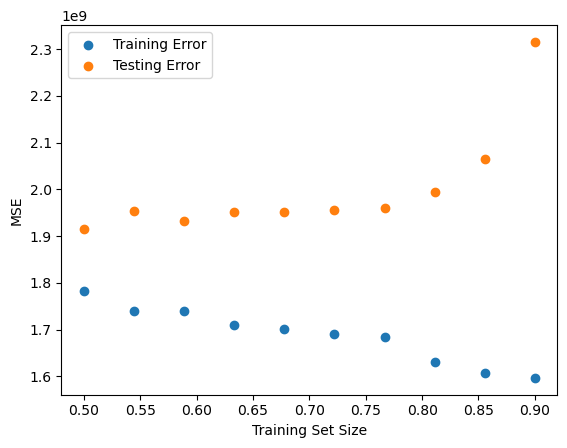

In [9]:
# Your code here
import matplotlib.pyplot as plt

train_mses = []
test_mses = []

t_sizes = np.linspace(0.5, 0.9, 10)

for t_size in t_sizes:
    inner_train_mses = []
    inner_test_mses = []

    for i in range(10):

        # Create new split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = t_size, random_state=i)

        # Transform training data
        X_train = pd.concat([
            pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
            pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
        ], axis=1)

        # Transform test data
        X_test = pd.concat([
            pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
            pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
        ], axis=1)

        # Fit with Training Data
        lr.fit(X_train, y_train)

        # Make predictions on training and test sets
        y_hat_train = lr.predict(X_train)
        y_hat_test = lr.predict(X_test)

        # Calculate MSE
        train_mse = mean_squared_error(y_hat_train, y_train)
        test_mse = mean_squared_error(y_hat_test, y_test)
        inner_train_mses.append(train_mse)
        inner_test_mses.append(test_mse)
    
    train_mses.append(np.mean(inner_train_mses))
    test_mses.append(np.mean(inner_test_mses))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Training Error')
ax.scatter(t_sizes, test_mses, label='Testing Error')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('MSE')
ax.legend();

What's happening here? Evaluate your result!


The graph shows the Mean Squared Error (MSE) for both training and testing sets as the training set size increases. Here's an evaluation of the results:

1. **Training Error (Blue Dots)**:
   - The training error decreases as the training set size increases.
   - This is expected because with more data, the model has more examples to learn from, which generally improves its performance on the training set.
   - The training error stabilizes around a certain point, indicating that adding more data doesn't significantly improve the model's ability to fit the training data beyond this point.

2. **Testing Error (Orange Dots)**:
   - The testing error decreases initially but then starts to increase slightly as the training set size increases.
   - Initially, the model benefits from having more data, improving its generalization to unseen data.
   - However, the increase in testing error after a certain point might indicate overfitting. As the model gets too tailored to the training data, its performance on unseen data can deteriorate.

3. **Gap Between Training and Testing Error**:
   - The gap between the training and testing error decreases as the training set size increases initially, which is a good sign that the model is improving its generalization.
   - Towards the end, as the testing error starts to increase while the training error continues to decrease or stabilizes, it indicates a potential overfitting issue. The model is performing very well on the training data but not as well on the testing data.

### Summary
- **Increasing Training Set Size**: Initially beneficial for both training and testing performance.
- **Overfitting Signs**: As the training set size gets very large, the training error continues to decrease, but the testing error increases, indicating overfitting.
- **Optimal Point**: There is an optimal training set size where the testing error is minimized. Beyond this point, adding more training data seems to cause overfitting.

To address overfitting, you might consider techniques like cross-validation, regularization, or pruning the model complexity. Additionally, ensuring that the training and testing data are representative and not biased can help improve generalization.


##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.